**Sampling Error:** Variability of a statistic from sample to sample.
- E.g., the mean of one sample will differ from the mean of a different/second sample.

**Sampling Distribution:** The distribution of a statisitic over repeated sampling from a population.

In [1]:
library(ggplot2)
options(repr.plot.width = 7, repr.plot.height = 5)

In [3]:
set.seed(1)
population <- rexp(10000000, rate = 1) * 40 + 1200

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


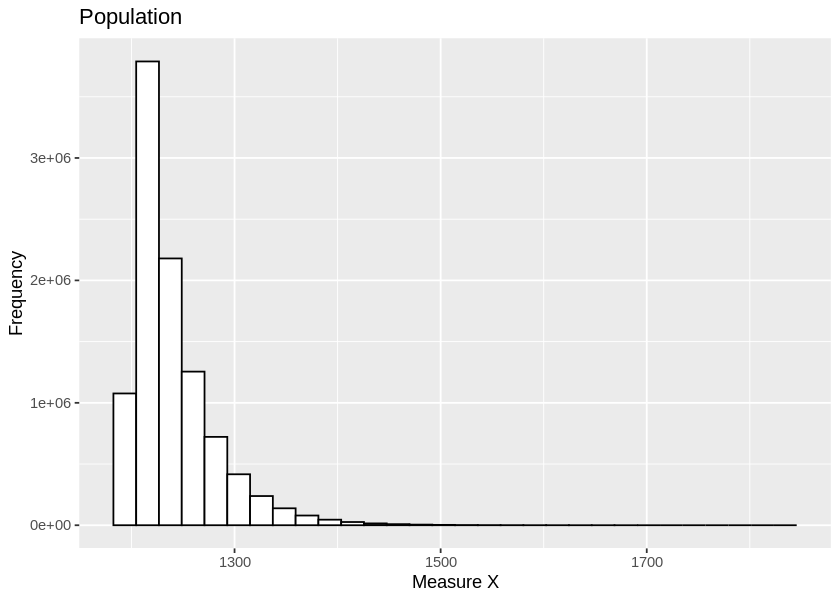

In [4]:
ggplot(mapping = aes(x = population)) +
  geom_histogram(fill = "white", colour = "black") +
  ggtitle("Population") + xlab("Measure X") + ylab("Frequency")

In [7]:
sample_1 <- sample(population, size = 50)
mean(sample_1)

[1] 1238.857

In [8]:
sample_2<- sample(population, size = 50)
mean(sample_2)

[1] 1241.178

In [22]:
set.seed(1)
sample_num <- 10000
means <- vector("double", length = sample_num) #empty vector

for (i in 1:sample_num)
{
means[i] <- mean(sample(population, size = 50))
}

sample_num <- 1:length(means)
df <- data.frame(sample_num, means)

In [23]:
#df

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


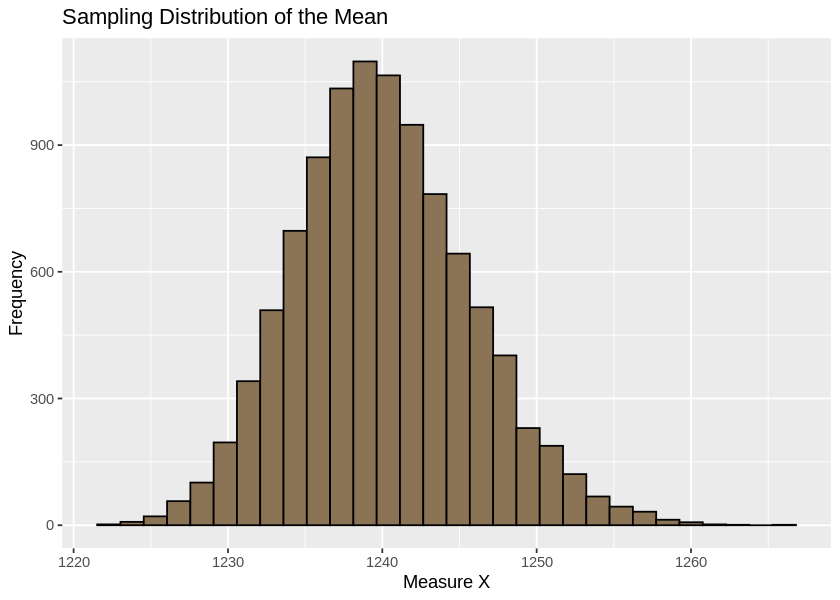

In [24]:
ggplot(df, aes(x = means)) +
  geom_histogram(fill = "burlywood4", colour = "black") +
  ggtitle("Sampling Distribution of the Mean") +
  xlab("Measure X") + ylab("Frequency")

According to the **central limit theorem**, the sampling distribution of a statistic will become more normally distributed as the sample size of the distribution grows.
- Works even if the population being sampled is non-normal.
- Samples need to be independent of one another and observations should be randomly collected.

# Sampling Distribution and the Population Mean

In [25]:
# Population Mean
mean(population)

[1] 1240.001

In [26]:
# Mean of the Sampling Distribution (of the mean)
mean(df$means)

[1] 1240.047

# $E(\bar{x}) = \mu$

# Sampling Distributions and Spread

In [27]:
sd(df$means)

[1] 5.700714

In [28]:
# Lower Bound
mean(df$means) - sd(df$means) * 1.96

#Upper Bound
mean(df$means) + sd(df$means) * 1.96

[1] 1228.874

[1] 1251.221

**Confidence Interval:** A range of values that are likely to contain the true *population mean*.

**Standard Error:** The standard deviation of a sampling distribution.
- Deviation = Error

# $\text{Standard Error of the Mean} = \sigma_{\bar{x}} = \frac{\sigma}{\sqrt{N}}$

In [29]:
# Standard Error of the Mean
sd(df$means)

[1] 5.700714

In [30]:
sd(population) / sqrt(50)

[1] 5.655561

# Using this in the Real World

Problem: In most cases we can't determine the standard error because:
1. We don't know the true population standard deviation.
2. We don't have access to the sampling distribution of that population.

# $\sigma_\bar{x} \approx \frac{s}{\sqrt{N}} = s_{\bar{x}}$

Solution: use the sample standard deviation ($s$) to estimate the population standard deviation.
  - Problem: does a poor job of estimating standard error when sample sizes are small.
    - Solution: Use a t-distribution to model the sampling distribution instead of a normal distribution. 